In [37]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [38]:
bot = datasets.load_boston()

In [39]:
bot

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [40]:
bot.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [41]:
df = pd.DataFrame(bot.data, columns=[bot.feature_names])

In [42]:
df["MEDV"] = bot.target

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
df.shape

(506, 14)

In [45]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [46]:
x = bot.data
y = bot.target

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42)

In [49]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((379, 13), (127, 13), (379,), (127,))

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linearreg = LinearRegression()

In [52]:
linearreg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's predict the value

In [53]:
ypred = linearreg.predict(xtest)

In [54]:
ydf = pd.DataFrame({"Actual": ytest, "Predicted": ypred})

In [55]:
ydf

,Actual,Predicted
0,23.6,28.838854
1,32.4,36.007833
2,13.6,15.083248
3,22.8,25.230909
4,16.1,18.878641
...,...,...
122,8.8,3.284209
123,19.2,23.798796
124,25.3,25.733299
125,20.4,23.048156


Let's Plot the graph to check the ytrue and ypredicted

In [56]:
from matplotlib import pyplot as plt

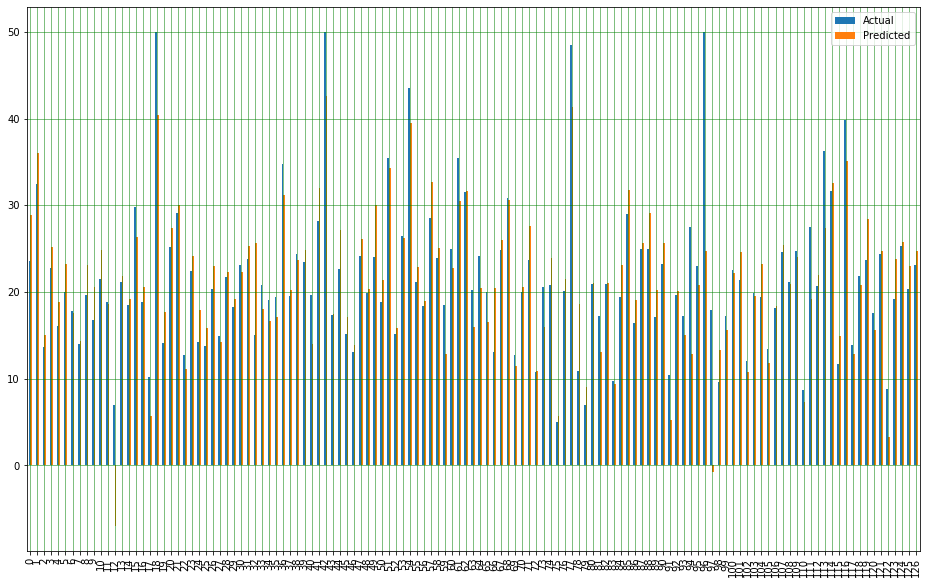

In [57]:
ydf.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

Let's Plot the grapf for top 25 rows in ydf DataFram.

In [58]:
df1 = ydf.head(25)

In [59]:
from matplotlib import pyplot as plt

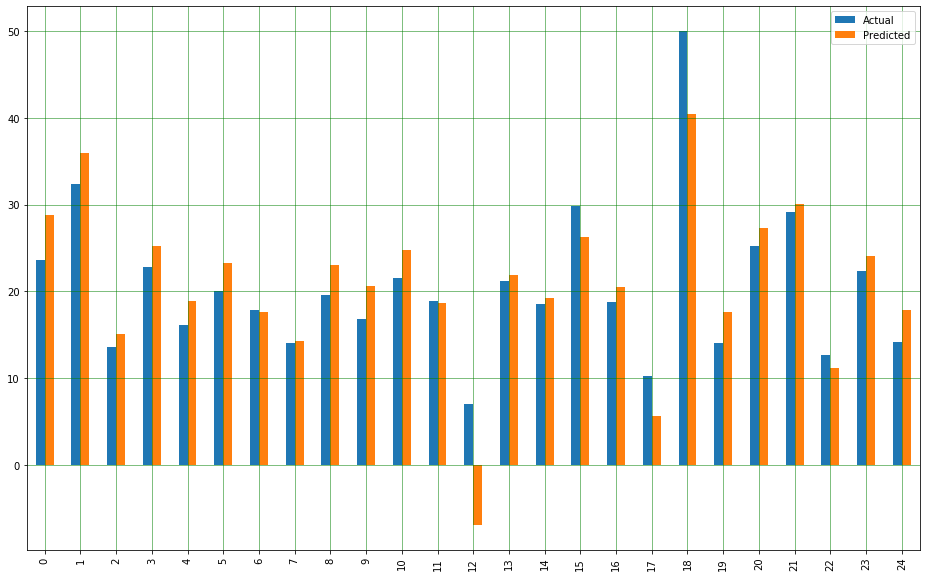

In [60]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

# Performance Measure 

Mean Squared Error Method

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [63]:
mse = mean_squared_error(ytest, ypred)

In [64]:
mse

22.098694827098036

RMSE = Root Mean Square Error, which is sqrt of mse error

In [65]:
rmse = np.sqrt(mse)

In [66]:
rmse

4.700924890603766

Mean Absolute Error

In [67]:
mae = mean_absolute_error(ytest, ypred)

In [68]:
mae

3.060939595437034

In [69]:
from sklearn.metrics import r2_score 

In [70]:
r2 = r2_score(ytest,ypred)

In [71]:
r2

0.6844267283527123